<a href="https://colab.research.google.com/github/JavierRodas/SP1_Dermatology/blob/main/Dermatology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparations


In [ ]:
# --------------- Librerias ---------------

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

AUTOTUNE = tf.data.AUTOTUNE

## Dataset Preparation


In [ ]:
# Descargar dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data

--2023-05-30 23:27:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25964 (25K) [application/x-httpd-php]
Saving to: ‘dermatology.data’

dermatology.data    100%[===================>]  25.36K  --.-KB/s    in 0.05s   

2023-05-30 23:27:31 (516 KB/s) - ‘dermatology.data’ saved [25964/25964]



### Loadign Dataset


In [ ]:
# --------------- Cargar dataset ---------------

# Nombres de las columnas
column_names = ['erythema',
                'scaling',
                'definite borders',
                'itching',
                'koebner phenomenon',
                'polygonal papules',
                'follicular papules',
                'oral mucosal involvement',
                'knee and elbow involvement',
                'scalp involvement',
                'family history',
                'melanin incontinence',
                'eosinophils in the ingiltrate',
                'PNL infiltrate',
                'fibrosis of the papillary dermis',
                'exocytosis',
                'acanthosis',
                'hyperkeratosis',
                'parakeratosis',
                'clubbing of the rete ridges',
                'elongation of the rete ridges',
                'thinning of the suprapapillary epidermis',
                'spongiform pustule',
                'munro microabcess',
                'focal hypergranulosis',
                'disappearance of the granular layer',
                'vacuolisation and damage of basal layer',
                'spongiosis',
                'saw-tooth appearance of retes',
                'follicular horn plug',
                'perifollicular parakeratosis',
                'inflammatory monoluclear inflitrate',
                'band-like infiltrate',
                'age',
                'erythemato-squamous diseases']

# Almacenar datos en la variable dataset
dataset = pd.read_csv("dermatology.data", names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

dataset

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,erythemato-squamous diseases
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3


### Dataset Summary


In [ ]:
# Resumen estadistico
dataset.describe()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,erythemato-squamous diseases
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,358.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.324557,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


In [ ]:
# Resumen del dataset
dataset.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,erythemato-squamous diseases
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [ ]:
# Tamaño del dataset
dataset.shape

(366, 35)

## Pre-prosessing

### Delete Null Values

In [ ]:
# Crear copia del dataset original
new_dataset = dataset.copy()

# Verificar si existen valores nulos
print(new_dataset.isna().sum())

# Borrar filas con valores nulos
new_dataset = new_dataset.dropna()

erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner phenomenon                          0
polygonal papules                           0
follicular papules                          0
oral mucosal involvement                    0
knee and elbow involvement                  0
scalp involvement                           0
family history                              0
melanin incontinence                        0
eosinophils in the ingiltrate               0
PNL infiltrate                              0
fibrosis of the papillary dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing of the rete ridges                 0
elongation of the rete ridges               0
thinning of the suprapapillary epi

### Normalize Values


In [ ]:
# Normalizar datos
def normalize(column):
  max_value = np.max(column)
  min_value = np.min(column)
  return (column - min_value)/(max_value - min_value)

In [ ]:
columns_to_normalize = new_dataset.columns
columns_to_normalize = columns_to_normalize[0:-1]

for column in columns_to_normalize:
  new_dataset[column] = normalize(new_dataset[column])

new_dataset.describe()
normalized_dataset = new_dataset.copy()
normalized_dataset

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,erythemato-squamous diseases
0,0.666667,0.666667,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.333333,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.333333,0.0,0.733333,2
1,1.000000,1.000000,1.000000,0.666667,0.333333,0.000000,0.0,0.000000,0.333333,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.333333,0.0,0.106667,1
2,0.666667,0.333333,0.666667,1.000000,0.333333,1.000000,0.0,1.000000,0.000000,0.000000,...,0.000000,0.666667,1.000000,0.666667,0.0,0.0,0.666667,1.0,0.346667,3
3,0.666667,0.666667,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.666667,...,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.533333,1
4,0.666667,1.000000,0.666667,0.666667,0.666667,0.666667,0.0,0.666667,0.000000,0.000000,...,0.666667,1.000000,0.666667,1.000000,0.0,0.0,0.666667,1.0,0.600000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.666667,0.333333,0.333333,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.333333,0.000000,0.0,0.0,0.666667,0.0,0.333333,4
362,1.000000,0.666667,0.333333,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,...,0.333333,0.000000,0.333333,0.000000,0.0,0.0,0.666667,0.0,0.480000,4
363,1.000000,0.666667,0.666667,0.666667,1.000000,0.666667,0.0,0.666667,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.666667,1.0,0.373333,3
364,0.666667,0.333333,1.000000,0.333333,0.666667,1.000000,0.0,0.666667,0.000000,0.000000,...,0.000000,0.666667,0.000000,0.333333,0.0,0.0,0.666667,1.0,0.666667,3


### Correlation Matrix

<Axes: >

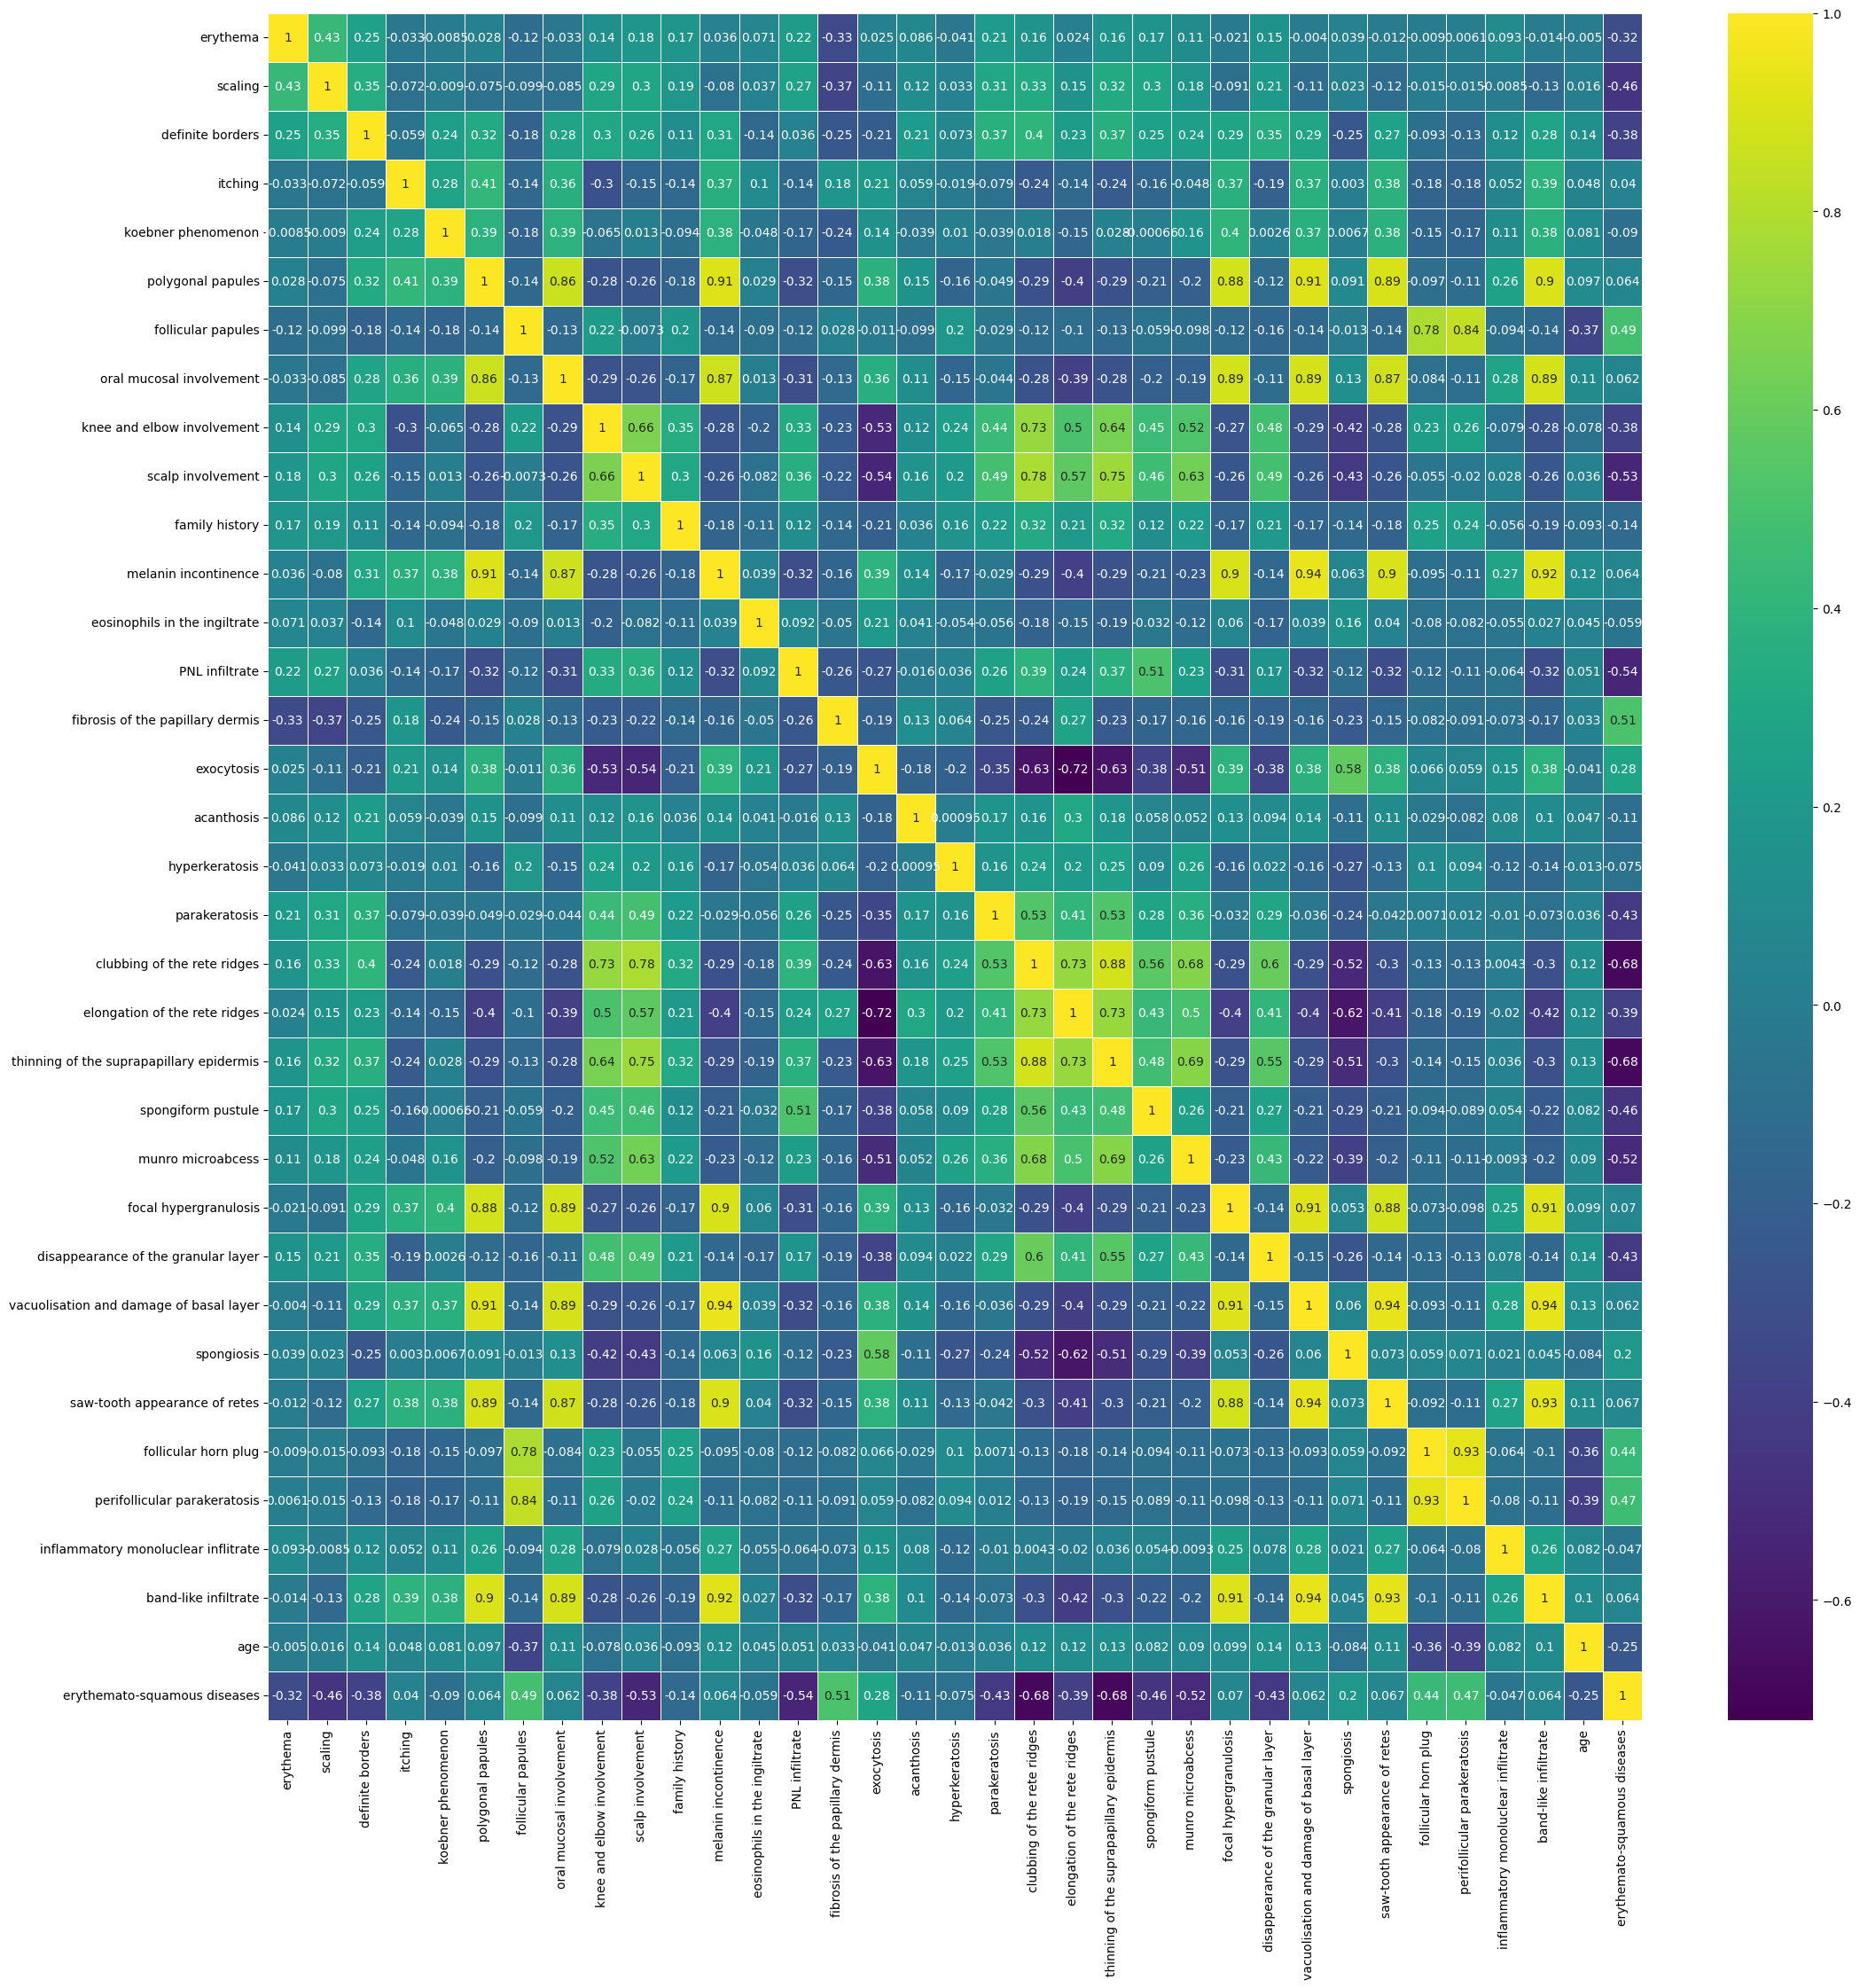

In [ ]:
# Calcular coeficiente de correlacion 
correlation_matrix = normalized_dataset.corr()

# Grafica
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, linewidths=.5, cmap='viridis', annot=True)

In [ ]:
# Eliminar columnas poco significativas
correlation_matrix["erythemato-squamous diseases"]
c = 0
for i in correlation_matrix["erythemato-squamous diseases"]:
  if (0.1 >= abs(i)):
    normalized_dataset.pop(column_names[c])
  c += 1

selective_dataset = normalized_dataset.copy()

### Balancing Classes

Class 2 :  60
Class 1 :  111
Class 3 :  71
Class 5 :  48
Class 4 :  48
Class 6 :  20


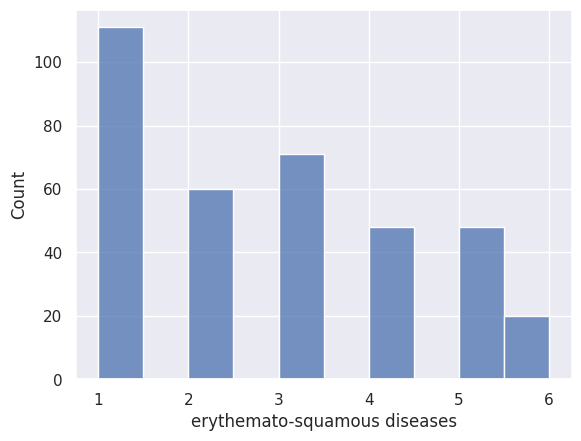

In [ ]:
# Verificar cantidad de datos por cada clase
for i in selective_dataset["erythemato-squamous diseases"].unique():
  numRows = len(selective_dataset[selective_dataset["erythemato-squamous diseases"] == i])
  print("Class", i, ": ", numRows)

sns.set(style="darkgrid")

sns.histplot(data= selective_dataset, x = "erythemato-squamous diseases")
plt.show()

Class 0 -> Psoriasis 

Class 1 -> Seboreic Dermatitis

Class 2 -> Lichen Planus

Class 3 -> Pityriasis Rosea

Class 4 -> Cronic Dermatitis

Class 5 -> Pityriasis Rubra Pilaris


In [ ]:
# Mapeo de Erythemato-Squamous Diseases
def map_eryth(x):
  return x - 1


In [ ]:
# Aplicar mapping a Erythemato-Squamous Diseases
selective_dataset["erythemato-squamous diseases"] = selective_dataset["erythemato-squamous diseases"].apply(map_eryth)

Class 1 :  60
Class 0 :  111
Class 2 :  71
Class 4 :  48
Class 3 :  48
Class 5 :  20


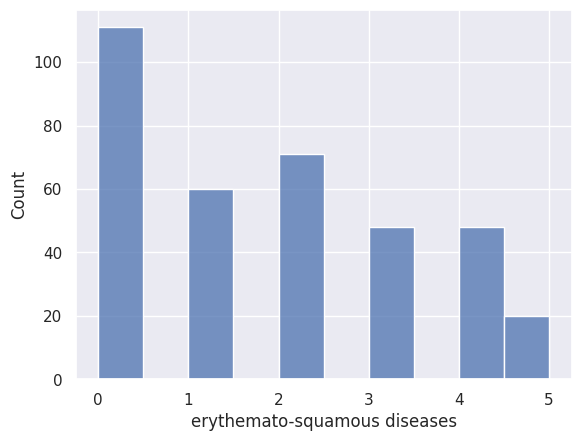

In [ ]:
for i in selective_dataset["erythemato-squamous diseases"].unique():
  numRows = len(selective_dataset[selective_dataset["erythemato-squamous diseases"] == i])
  print("Class", i, ": ", numRows)

sns.set(style="darkgrid")

sns.histplot(data= selective_dataset, x = "erythemato-squamous diseases")
plt.show()

In [ ]:
values = selective_dataset['erythemato-squamous diseases'].value_counts()
values

0    111
2     71
1     60
4     48
3     48
5     20
Name: erythemato-squamous diseases, dtype: int64

In [ ]:
# Extraer cuantos datos existen en la clase 0
class_cero_count = selective_dataset['erythemato-squamous diseases'].value_counts()[0]

# Oversample
oversampled_class_one = selective_dataset[selective_dataset['erythemato-squamous diseases'] == 1].sample(class_cero_count, replace=True)
oversampled_class_two = selective_dataset[selective_dataset['erythemato-squamous diseases'] == 2].sample(class_cero_count, replace=True)
oversampled_class_three = selective_dataset[selective_dataset['erythemato-squamous diseases'] == 3].sample(class_cero_count, replace=True)
oversampled_class_four = selective_dataset[selective_dataset['erythemato-squamous diseases'] == 4].sample(class_cero_count, replace=True)
oversampled_class_five = selective_dataset[selective_dataset['erythemato-squamous diseases'] == 5].sample(class_cero_count, replace=True)

oversampled_class_one

,erythema,scaling,definite borders,follicular papules,knee and elbow involvement,scalp involvement,family history,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,...,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,disappearance of the granular layer,spongiosis,follicular horn plug,perifollicular parakeratosis,age,erythemato-squamous diseases
149,0.666667,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.666667,0.0,0.0,0.600000,1
195,0.666667,0.666667,0.333333,0.0,0.000000,0.0,0.0,0.333333,0.0,0.666667,...,0.000000,0.000000,0.333333,0.0,0.0,1.000000,0.0,0.0,0.293333,1
187,0.666667,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.666667,0.0,1.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.666667,0.0,0.0,0.693333,1
199,1.000000,0.666667,0.333333,0.0,0.000000,0.0,0.0,0.333333,0.0,0.666667,...,0.000000,0.000000,0.000000,0.0,0.0,0.666667,0.0,0.0,0.586667,1
197,1.000000,0.666667,0.666667,0.0,0.000000,0.0,0.0,0.333333,0.0,0.333333,...,0.000000,0.000000,0.333333,0.0,0.0,0.666667,0.0,0.0,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.666667,0.666667,0.333333,0.0,0.000000,0.0,0.0,0.333333,0.0,0.666667,...,0.000000,0.000000,0.333333,0.0,0.0,1.000000,0.0,0.0,0.293333,1
278,1.000000,0.666667,0.666667,0.0,0.333333,0.0,1.0,0.333333,0.0,1.000000,...,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.0,0.213333,1
284,0.666667,0.666667,0.666667,0.0,0.000000,0.0,0.0,0.000000,0.0,0.666667,...,0.000000,0.000000,0.000000,0.0,0.0,0.666667,0.0,0.0,0.933333,1
359,0.666667,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,1.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.666667,0.0,0.0,0.533333,1


In [ ]:
#Extraer cuantos datos existen en la clase 0
class_cero_dataset = selective_dataset[selective_dataset['erythemato-squamous diseases'] == 0]

# Combinar ambos datasets
oversampled_dataset = pd.concat([class_cero_dataset, oversampled_class_one, oversampled_class_two, oversampled_class_three, oversampled_class_four, oversampled_class_five])

# Ordernar
oversampled_dataset = oversampled_dataset.sample(frac=1).reset_index(drop=True)

oversampled_dataset

,erythema,scaling,definite borders,follicular papules,knee and elbow involvement,scalp involvement,family history,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,...,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,disappearance of the granular layer,spongiosis,follicular horn plug,perifollicular parakeratosis,age,erythemato-squamous diseases
0,0.666667,0.666667,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.666667,...,0.0,0.0,0.000000,0.0,0.666667,0.333333,0.000000,0.000000,0.373333,2
1,0.666667,0.666667,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.746667,2
2,0.666667,0.666667,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.666667,...,0.0,0.0,0.000000,0.0,0.333333,0.666667,0.000000,0.000000,0.266667,3
3,0.666667,0.333333,0.333333,0.666667,1.000000,0.666667,0.0,0.333333,0.0,0.333333,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.160000,5
4,0.666667,0.666667,0.333333,0.000000,0.000000,0.000000,0.0,0.333333,0.0,0.666667,...,0.0,0.0,0.333333,0.0,0.000000,1.000000,0.000000,0.000000,0.293333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,1.000000,0.666667,0.666667,1.000000,0.333333,0.000000,1.0,0.000000,0.0,0.333333,...,0.0,0.0,0.000000,0.0,0.000000,0.666667,1.000000,0.666667,0.133333,5
662,1.000000,0.666667,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,...,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.453333,2
663,0.666667,1.000000,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,...,0.0,0.0,0.000000,0.0,0.666667,0.333333,0.000000,0.000000,0.360000,2
664,0.666667,0.333333,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.333333,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.666667,2


Class 2 :  111
Class 3 :  111
Class 5 :  111
Class 1 :  111
Class 4 :  111
Class 0 :  111


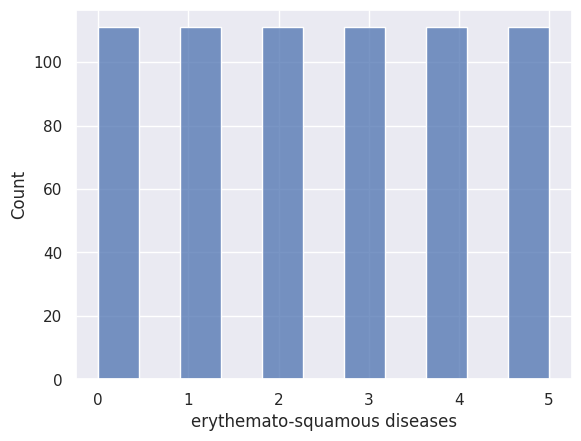

In [ ]:
# Mostrar cantidad de datos por cada clase
for i in oversampled_dataset["erythemato-squamous diseases"].unique():
  numRows = len(oversampled_dataset[oversampled_dataset["erythemato-squamous diseases"] == i])
  print("Class", i, ": ", numRows)

sns.set(style="darkgrid")

sns.histplot(data= oversampled_dataset, x = "erythemato-squamous diseases")
plt.show()

In [ ]:
# Dividir dataset. 20% test, 80% training
train, test = train_test_split(oversampled_dataset, test_size=0.2) # ← Test is 20% and training is 80%

# Separar sets en variables dependientes e independientes
independent_variables = list(selective_dataset.columns)
independent_variables.remove('erythemato-squamous diseases')
dependent_variables = ['erythemato-squamous diseases']

train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

## AI Model


### Callbacks

In [ ]:
# EarlyStopping
earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5,)

### AI Model


In [ ]:
# Construccion de modelo
normal_model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(len(independent_variables))),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=32, activation='relu'),
  tf.keras.layers.Dense(units=6, activation='softmax') 
  ])

# Compilar modelo
normal_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Entrenar modelo
normal_model.fit(train_set,
          train_target,
          epochs=100,
          batch_size = 128 ,
          validation_split = 0.2,
          callbacks=[earlystopping_callback]
        )

Epoch 1/100
4/4 [==============================] - 1s 51ms/step - loss: 1.7571 - accuracy: 0.1553 - val_loss: 1.7634 - val_accuracy: 0.2243
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 1.7179 - accuracy: 0.3694 - val_loss: 1.7358 - val_accuracy: 0.2804
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 1.6827 - accuracy: 0.4094 - val_loss: 1.7096 - val_accuracy: 0.3271
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 1.6491 - accuracy: 0.4282 - val_loss: 1.6818 - val_accuracy: 0.3458
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 1.6124 - accuracy: 0.4541 - val_loss: 1.6497 - val_accuracy: 0.3832
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 1.5727 - accuracy: 0.4682 - val_loss: 1.6130 - val_accuracy: 0.4393
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 1.5291 - accuracy: 0.5129 - val_loss: 1.5720 - val_accuracy: 0.5140
Epoch 8/100
4/4 [=======

In [ ]:
# Evaluar modelo
normal_model.evaluate(x=test_set, y=test_target, batch_size=128)

2/2 [==============================] - 0s 5ms/step - loss: 0.2344 - accuracy: 0.9030


[0.2344198375940323, 0.9029850959777832]

5/5 [==============================] - 0s 2ms/step


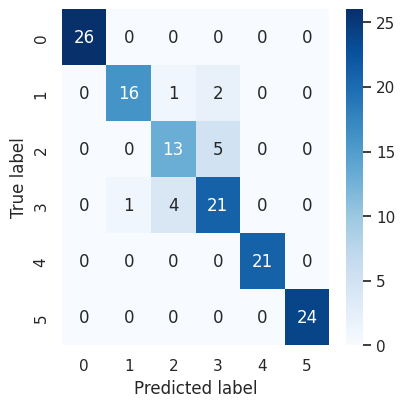

In [ ]:
# Funcion de matriz
def plot_confusion_matrix(labels, predictions):
  figure = plt.figure(figsize=(4, 4))
  sns.heatmap(confusion_matrix(labels=labels, predictions=predictions), annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Matriz de confusion
predictions = list(map(lambda x: np.argmax(x), normal_model.predict(test_set)))

plot_confusion_matrix(labels=test_target, predictions=predictions)